## 2.2 Simple Pendulum - Verlet & Euler

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots

In [3]:
plt.style.use(('default'))

In [10]:
method = 'E' # E for Euler or V for Verlet
g_over_l = 1.0
steps = 300
tau = 0.1
time_plot = np.empty(steps-1)
irev = np.empty(steps-1)
revs = 0
theta = np.deg2rad(10)   # initial angle 
omega = 0.               # intial velocity
# initialise position and velocity
theta_plot = np.empty(steps-1)
omega_plot = np.empty(steps-1)
T_k = []


accel = -g_over_l * np.sin(theta)
back_step = theta - tau*omega + tau**2/2 * accel       # Back step to start Verlet

for i in range(steps-1):

    # Record data from previous step for plotting
    theta_plot[i] = theta
    omega_plot[i] = omega
    time_plot[i] = tau * i
    accel = -g_over_l * np.sin(theta_plot[i])

    if method == 'E':       # Check Method
        # Take Euler step
        theta = theta + tau * omega
        omega = omega + tau * accel
        
    
    elif method == 'V':
        theta_new = 2*theta - back_step + tau**2 * accel # calulate new theta (n+1)
        back_step = theta       # new back step theta (n-1)
        theta = theta_new       # current theta for next iteration (n)

        
    # if changes direction, estimate period
    if theta_plot[i-1] * theta_plot[i] < 0:
        revs += 1
        irev[revs] = i
        if revs == 1:
            continue 
        T_k.append(2 * tau * (irev[revs] - irev[revs-1]))




# Period calculation:
T_k_arr = np.array(T_k)
M = 0
T_avg =np.mean(T_k_arr)
s = np.std(T_k_arr)
Error = s/np.sqrt(T_avg)
print(f'The average period of oscillation is {T_avg:.3f}s with an error of {Error:.3f}s')

# plt.plot(time_plot, np.rad2deg(theta_plot[:steps]))

The average period of oscillation is 6.375s with an error of 0.026s


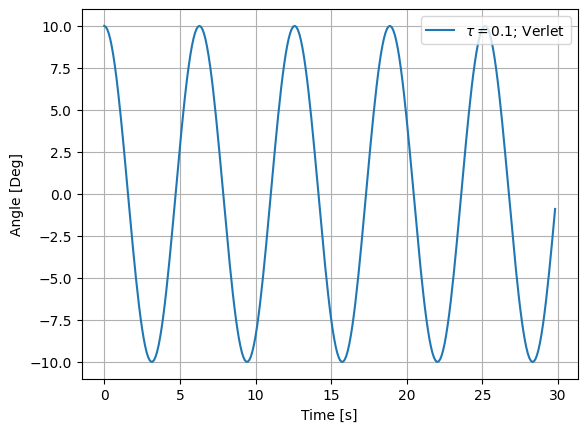

In [9]:
plt.plot(time_plot, np.rad2deg(theta_plot[:steps]), label=r'$ \tau= 0.1$; Verlet')
plt.xlabel('Time [s]'); plt.ylabel('Angle [Deg]')
plt.grid()
plt.legend(loc='upper right')
plt.show()

Using Euler method we see the truncation error accumulates, resulting in a steady increase in the amplitude of oscillation - violating energy conservation. Decreasing time step improves the error but doesn't remove it.

Verlet method conserves energy.

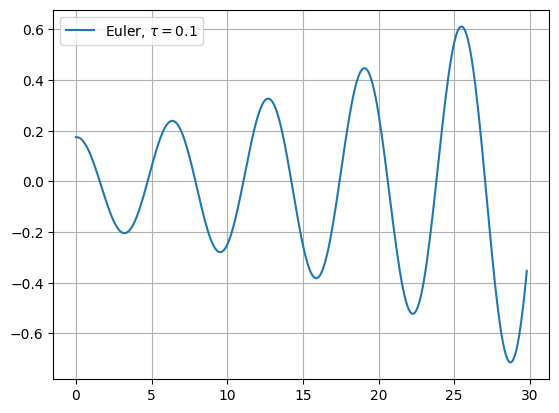

In [14]:
plt.plot(time_plot, theta_plot[:steps], label=r'Euler, $\tau = 0.1$')
plt.grid()
plt.legend()
plt.show()